Implement the Logistic Regression learning by gradient ascent as described in class.
On any of the six binary classification datasets, using the training and test sets specified
in ProjectsData.pdf, perform the following tasks:

a) Train a logistic regressor on the training set, starting with w = 0, with 300
gradient ascent iterations and shrinkage taking values  2 f10; 100; 1000g (in
the update equation from slide 9). For each  find a good learning rate  such
that the negative log-likelihood decreases and levels off. Plot the negative loglikelihood
vs iteration number. (2 points)

b) Report in a table the misclassification error for all three models from a) on the
training and test sets. (1 point)

In [35]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [36]:
def normalize(x, mean, sigma):
    return (x-mean)/sigma

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def classify(x,weights):
    n= x.shape[0]
    res=np.zeros(n)
    for i in range(n):
        sigm=sigmoid(np.dot(x[i],weights))
        if sigm>=0.5:
            res[i]=1
        else:
            res[i]=0
    return res 
    
def log_likelihood(weights, x, y):
    n = x.shape[0]
    tmp = 0
    for j in range(n):
        tmp += y[j]*np.dot(x[j],weights) - math.log(1+math.exp(np.dot(x[j],weights)))
    return tmp

def update_wights(weights, x, y, eta, l):
    n = x.shape[0]
    m = x.shape[1]
    tmp=np.zeros(m)
    for j in range(n):
        tmp += x[j]*(y[j]-sigmoid(np.dot(x[j],weights)))    
    weights = weights - weights/l*eta + eta*tmp
    return weights

Load Training Data

In [37]:
#load training data
x = np.loadtxt('/Users/soumak/Google Drive/computer science/machine_learning_barbu/binary_datasets/hill-valley/X.dat')
#load class labels
y = np.loadtxt('/Users/soumak/Google Drive/computer science/machine_learning_barbu/binary_datasets/hill-valley/Y.dat')

In [38]:
#Number of training samples
n= len(x)
#number of features
m= len(x[0])

In [39]:
x.shape

(606, 100)

In [40]:
y.shape

(606,)

In [41]:
#replace -1 by 0, to use the equation from slide
y[y==-1]=0

In [42]:
#normalize training data
mean = np.mean(x, axis=0)
std = np.std(x, axis=0)
x = normalize(x, mean , std)

Hyperparameter

In [67]:
eta = (10**-4)
#shrinkage rate
l = 1000
#no. of iternation
itr=4000

In [44]:
#fisrt augment x with 1
x = np.insert(x,0,1,axis=1)

In [68]:
#create a list to hold each iteration
log_list=np.zeros(itr)
#initialize weight matrix
weights = np.zeros(m+1)

In [69]:
import math
for i in range(itr):
    log_list[i] = -log_likelihood(weights, x, y)
    weights = update_wights(weights, x, y, eta, l)


In [70]:
#classify training samples
res = np.zeros(n)

res = classify(x, weights)

error = 0;

for i in range(n):
    if res[i] != y[i]:
        error += 1

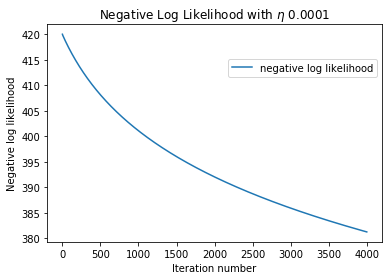

In [71]:
#plot log likelihood vs iteration
itr_range = list(range(1,itr+1))
plt.plot(itr_range,log_list,label="negative log likelihood")
plt.legend(bbox_to_anchor=(1,0.8),loc='center right')
plt.xlabel("Iteration number")
plt.ylabel("Negative log likelihood")
plt.title("Negative Log Likelihood with " +r"$\eta$ "+str(eta))
plt.show()

In [49]:
print ("Classification error for Training data: ", 100*error/n, "%" )

Classification error for Training data:  44.71947194719472 %


In [50]:
#classify Test data
x_test = np.loadtxt('/Users/soumak/Google Drive/computer science/machine_learning_barbu/binary_datasets/hill-valley/Xtest.dat')
x_test = normalize(x_test, mean , std)
x_test = np.insert(x_test,0,1,axis=1)

y_test = np.loadtxt('/Users/soumak/Google Drive/computer science/machine_learning_barbu/binary_datasets/hill-valley/Ytest.dat')
y_test[y_test==-1]=0

res = classify(x_test, weights)

error = 0;

for i in range(x_test.shape[0]):
    if res[i] != y[i]:
        error += 1
        
print ("Classification error for Test data: ", 100*error/n, "%") 

Classification error for Test data:  49.00990099009901 %


# Now we will use Sklearn package

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
sc.fit(x)
X_train_std = sc.transform(x)
X_test_std = sc.transform(x_test)


In [54]:
lr = LogisticRegression(C=1000.0, max_iter=300, random_state=0)
lr.fit(X_train_std, y)

/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' %(y_test != y_pred).sum())

Misclassified samples: 142


In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))

Accuracy: 0.77
